# Quantum erasure module




Name and Surname: Nahomé Vesvard

Group: 6

Experiment date and time: 18/11, 15h-18h

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import *
%matplotlib inline

## Coincidence settings

### Scan of the delay

Best relative delay: 2.0 ns


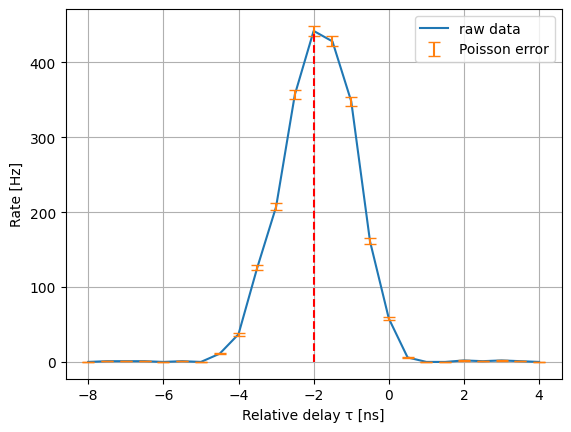

In [2]:
file = "scan.csv"

def conv(s):
    s = s.strip()
    if s in ('NaN', 'nan', ''):
        return np.nan
    return float(s.replace(',', '.'))

delay = np.loadtxt(file, delimiter=";", skiprows = 1, usecols = 0, converters={0: conv})
rate = np.loadtxt(file, delimiter=";", skiprows = 1, usecols = 1, converters={1: conv})

for i in range (len(delay)):
  if rate[i] == max(rate):
    best_delay = delay[i]
    best_relative_delay = abs(delay[i])

print(f"Best relative delay: {best_relative_delay} ns")

# Poisson error:

T = 10 # [s]
C = rate*T
std_dev = np.sqrt(C)/T

plt.plot(delay, rate, label = "raw data")
plt.errorbar(
    delay,
    rate,
    yerr=std_dev,

    linestyle='none',
    capsize=4,
    label="Poisson error"
)
plt.grid()
plt.xlabel("Relative delay τ [ns]")
plt.ylabel("Rate [Hz]")
plt.vlines(best_delay, 0, max(rate), linestyles="dashed", colors="red")
plt.text
plt.legend()
plt.show()

In our experiment, photons are emitted in pairs with a small angle which means they take different path: one of them comes to detector T and the other to detector B. Because the paths are of different length , two photons from the same pair will not be detected at the same time. Therefore, we need to introduce a delay in our coincidence measurement settings in order to detect the accurate paired photons.

To find this relative delay, the timetagger shifts one channel by a trial delay τ and counts how many coincidences fall within a small time window. Repeating this for many τ values gives the coincidence rate as a function of
relative delay.

After performing this measurement, we get the graph displayed above this caption: it is the convolution of the gaussian time distribution with a rectangular function (window width) with . The right delay is the one where the coincidence rate is maximum, that is for τ = 2 ns. Far from the optimum delay the rate is almost zero, meaning we mostly see random (accidental) coincidences.
Error bars correspond to Poisson counting uncertainty, $σ_R = \frac{\sqrt{C}}{T}$ so they scale with the square root of the number of detected coincidences in each delay bin, which is why there's more uncertainty towards the peak.




### Choice of the coincidence window width


**Purpose of this experiment:**

Choosing a coincidence window width is equivalent to answer the question : What is the widest time difference between two detection events such that we still consider them to come from the same photon pair?

On the one hand, we need to allow enough time to be able to capture enough data and not miss any true simultaneus photons. On the other hand, the time window shall not be too large so that accidental coincidences do not become prominent.

In this experiment we measure the true coincidence rate and the accidental coincidence rate as a function of the coincidence window width. From these results, we select a window size that captures most of the true coincidences while keeping the accidental background low, thereby achieving a good signal-to-noise ratio.

In [3]:
CW = []     # width of the coincidence windows in ns
TSRT = []   # single detection rate on detector T in Hz
TSRB = []   # single detection rate on detector B in Hz
TCR = []    # coincidence rate in Hz
TCC = []    # coincidence count
ASRT = []   # accidental detection rate on detector T in Hz
ASRB = []   # accidental detection rate on detector B in Hz
ACR = []    # accidental coincidence rate in Hz
ACC = []    # accidental coincidence count

for i in range (1,7):
  CW.append(i)
  coinc = f"coinc_{i}.csv"
  acc = f"acc_{i}.csv"
  coinc_file = np.loadtxt(coinc, delimiter=";", skiprows = 3, usecols = 1, converters={1: conv})
  acc_file = np.loadtxt(acc, delimiter=";", skiprows = 3, usecols = 1, converters={1:conv})
  TSRT.append(coinc_file[7])
  TSRB.append(coinc_file[9])
  TCR.append(coinc_file[11])
  TCC.append(coinc_file[4])
  ASRT.append(acc_file[7])
  ASRB.append(acc_file[9])
  ACR.append(acc_file[11])
  ACC.append(acc_file[4])

T = 10 # s

std_TCC = np.sqrt(TCC)
std_rate = std_TCC/T

std_ACC = np.sqrt(ACC)
std_rate_acc = std_ACC/T

data = {
    "coincidence_window": np.array(CW),
    "true_single_rate_T": np.array(TSRT),
    "true_single_rate_B": np.array(TSRB),
    "true_coinc_rate": np.array(TCR),
    "acc_single_rate_T": np.array(ASRT),
    "acc_single_rate_B": np.array(ASRB),
    "acc_coinc_rate": np.array(ACR),
}

chosen_coincidence_window = 4  # Change this after you choose the best window
print(f"Chosen coincidence window: {chosen_coincidence_window} ns")

df_coincidence = pd.DataFrame(data)
df_coincidence["expected_acc_coinc_rate"] = df_coincidence["acc_single_rate_T"]*df_coincidence["acc_single_rate_B"]*df_coincidence["coincidence_window"]*1e-9
df_coincidence["snr"] = (df_coincidence["true_coinc_rate"] - df_coincidence["acc_coinc_rate"])/df_coincidence["acc_coinc_rate"] #Signal to Noise Ratio
df_coincidence

Chosen coincidence window: 4 ns


,coincidence_window,true_single_rate_T,true_single_rate_B,true_coinc_rate,acc_single_rate_T,acc_single_rate_B,acc_coinc_rate,expected_acc_coinc_rate,snr
0,1,166629.1,4767.7,439.3,166479.8,4792.3,0.8,0.797821,548.125000
1,2,166861.0,4742.7,815.4,166902.9,4790.4,1.4,1.599063,581.428571
2,3,166753.8,4754.9,1030.9,166641.5,4816.3,2.1,2.407786,489.904762
3,4,166677.1,4710.4,1102.0,166610.4,4845.4,2.7,3.229176,407.148148
4,5,166459.3,4704.4,1122.3,166521.1,4798.2,5.5,3.995008,203.054545
5,6,166881.6,4780.0,1111.1,166670.0,4784.3,4.0,4.784396,276.775000


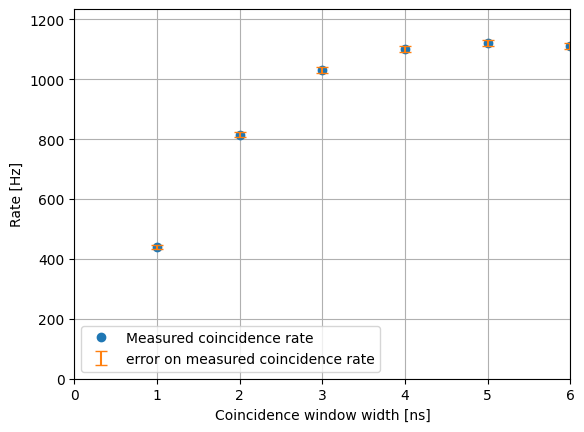

In [4]:
# Note that these quick plots have no error bars, but your final ones should!
plt.figure()
plt.plot(df_coincidence["coincidence_window"], df_coincidence["true_coinc_rate"], linestyle="None", marker="o", label="Measured coincidence rate")
plt.xlabel("Coincidence window width [ns]")
plt.ylabel("Rate [Hz]")

plt.errorbar(
    df_coincidence["coincidence_window"],
    df_coincidence["true_coinc_rate"],
    yerr=std_rate,
    linestyle="none",
    capsize=4,
    label="error on measured coincidence rate",
)

plt.xlim(0, df_coincidence["coincidence_window"].max())
plt.ylim(0, df_coincidence["true_coinc_rate"].max()*1.1)
plt.legend()
plt.grid()

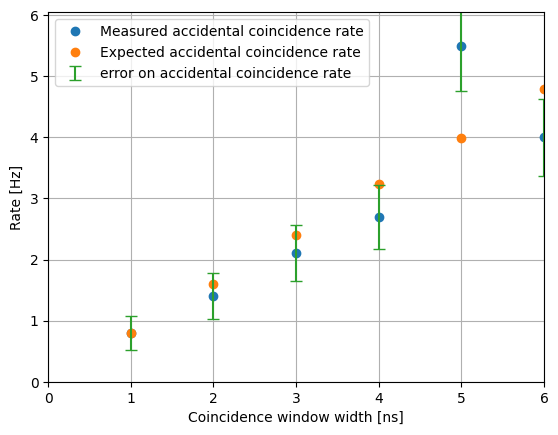

In [5]:


plt.figure()
plt.plot(df_coincidence["coincidence_window"], df_coincidence["acc_coinc_rate"], linestyle="None", marker="o", label="Measured accidental coincidence rate")
plt.plot(df_coincidence["coincidence_window"], df_coincidence["expected_acc_coinc_rate"], linestyle="None", marker="o", label="Expected accidental coincidence rate")
plt.xlabel("Coincidence window width [ns]")
plt.ylabel("Rate [Hz]")

plt.errorbar(
    df_coincidence["coincidence_window"],
    df_coincidence["acc_coinc_rate"],
    yerr=std_rate_acc,
    linestyle="none",
    capsize=4,
    label="error on accidental coincidence rate",
)

plt.xlim(0, df_coincidence["coincidence_window"].max())
plt.ylim(0, max(df_coincidence["acc_coinc_rate"].max(), df_coincidence["expected_acc_coinc_rate"].max())*1.1)
plt.legend()
plt.grid()



Theoretically, accidental coincidences scale linearly with coincidence window width:
<center>
$ R_{acc} = R_B * R_T * \tau $
</center>

where $R_B, R_T$ are the single detection rate on detector B and T and $\tau$ the coincidence width. They're mainly caused by SPDC photons from different pairs, background light and dark counts.

Our experimental points seem to follow a linear growth as well, except for at larger window widths (5–6 ns) where the scatter increases and some points (especially the one for τ = 5ns) deviate from the simple linear prediction, but the discrepancies are still of the order of the Poisson uncertainties.

Comparing the two curves, we choose a coincidence window of 4 ns. For window widths larger than about 4 ns the total coincidence rate is essentially saturated, so increasing the window further would mainly increase the number of accidental coincidences without significantly improving the true coincidence rate.





## Coherence measurement

### Minimum and maximum rates



**Purpose of this experiment:**

During the lab, we got familiar with the coherence length property of light with using a LED source, a beam splitter and a white screen.

By moving the LED source using the fine adjuster and the kinematic screws, we change the lenght difference of the two arms of the beam splitter: $\Delta L = L_A-L_B$.
The figure on the screen changes: for a certain range of distances, an interference pattern with alternating bright and dark regions appears. When the source is moved outside this range, the interference pattern disappears and the image collapses to a uniform illumination.

Manifestly, light can interefere for only a few values of $\Delta L$. In fact, Each light source has a characteristic coherence length $L_c$ below which the two beams maintain phase coherence and interference is visible.
Therefore, for the purpose of observing quantum erasure phenomenon, we need to find the coherence length of our Michaelson interferometer set up.

In [6]:
initial_position_ruler = 5 # Replace with your data
initial_position_coarse_adjuster = 2.25
initial_position_fine_adjuster = 34

final_position_ruler = 5 # Replace with your data
final_position_coarse_adjuster = 2.25
final_position_fine_adjuster = 36

P = [0, 10, 20, 30, 40, 50, -10, -20, -30, -40, -50, -60]
Min_coinc_rate = []
Max_coinc_rate = []
Min_coinc_count = []
Max_coinc_count = []

for i in range (len(P)):
  pos = P[i]
  coh = f"coh_{pos}.csv"
  coh_rate = np.loadtxt(coh, delimiter=";", skiprows = 1, usecols = 9, converters={9: conv}, encoding='latin-1')
  coh_count = np.loadtxt(coh, delimiter=";", skiprows = 1, usecols = 9, converters={9: conv}, encoding='latin-1')
  Min_coinc_rate.append(min(coh_rate))
  Max_coinc_rate.append(max(coh_rate))
  Min_coinc_count.append(min(coh_count))
  Max_coinc_count.append(max(coh_count))

data = {
    "delta_position_fine_adjuster": np.array(P), # Change this only if you choose different positions
    "min_coincidence_rate": np.array(Min_coinc_rate),
    "max_coincidence_rate": np.array(Max_coinc_rate),
}
df_coherence = pd.DataFrame(data)
df_coherence["position_fine_adjuster"] = final_position_fine_adjuster + df_coherence["delta_position_fine_adjuster"]
df_coherence["visibility"] = (df_coherence["max_coincidence_rate"] - df_coherence["min_coincidence_rate"])/(df_coherence["max_coincidence_rate"] + df_coherence["min_coincidence_rate"])
df_coherence

,delta_position_fine_adjuster,min_coincidence_rate,max_coincidence_rate,position_fine_adjuster,visibility
0,0,116.0,3109.0,36,0.928062
1,10,340.0,2892.0,46,0.789604
2,20,808.0,2339.0,56,0.486495
3,30,1380.0,1848.0,66,0.144981
4,40,1407.0,1821.0,76,0.128253
5,50,1361.0,1852.0,86,0.152817
6,-10,326.0,2890.0,26,0.797264
7,-20,756.0,2490.0,16,0.534196
8,-30,1300.0,1944.0,6,0.198520
9,-40,1467.0,1759.0,-4,0.090515


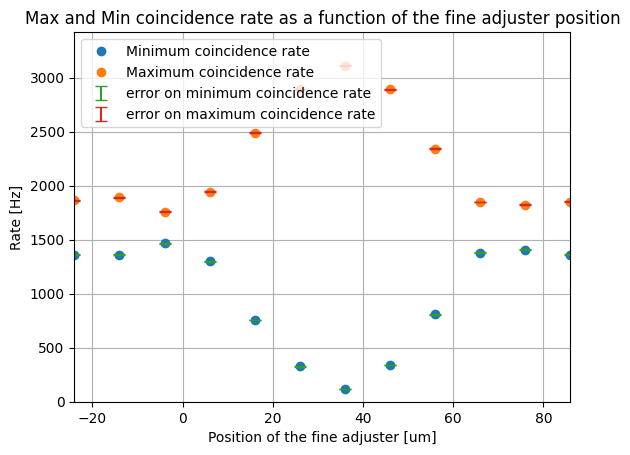

In [7]:
# Adding errorbars

std_dev_count_min = np.sqrt(Min_coinc_count)
std_dev_count_max = np.sqrt(Max_coinc_count)

T = 10 # integration time [s]

std_dev_rate_min = std_dev_count_min/T
std_dev_rate_max = std_dev_count_max/T

plt.figure()
plt.plot(df_coherence["position_fine_adjuster"], df_coherence["min_coincidence_rate"], linestyle="None", marker="o", label="Minimum coincidence rate")
plt.plot(df_coherence["position_fine_adjuster"], df_coherence["max_coincidence_rate"], linestyle="None", marker="o", label="Maximum coincidence rate")

# min coincidence rate with error bars
plt.errorbar(
    df_coherence["position_fine_adjuster"],
    df_coherence["min_coincidence_rate"],
    yerr= std_dev_rate_min,
    linestyle="none",
    capsize=4,
    label="error on minimum coincidence rate",
)

# max coincidence rate with error bars
plt.errorbar(
    df_coherence["position_fine_adjuster"],
    df_coherence["max_coincidence_rate"],
    yerr= std_dev_rate_max,
    linestyle="none",
    capsize=4,
    label="error on maximum coincidence rate",
)

plt.xlabel("Position of the fine adjuster [um]")
plt.ylabel("Rate [Hz]")
plt.xlim(df_coherence["position_fine_adjuster"].min(), df_coherence["position_fine_adjuster"].max())
plt.ylim(0, df_coherence["max_coincidence_rate"].max()*1.1)
plt.title("Max and Min coincidence rate as a function of the fine adjuster position")
plt.legend()
plt.grid()

# print(std_dev_rate_min, std_dev_rate_max)

For each Position of the fine adjuster, the software performs a scan of the phase between [9, 11] $\mu m$ and records the coincidence rate at each piezo position. We extracted for each $\Delta L$ the maximum (orange) and minimum (blue) of the rates scanned. Around $ L = 30/40 \mu m$, the gap between the two curves is the largest, then it decreases symmetrically around that central position.

On the Michaelson tab we observe coincidence rates oscillating with a period of about 400 nm, which matches the pump wavelength (~405 nm) because the two-photon state inherits its phase coherence from the pump beam.

<center>
$\Delta \phi = \frac {2\pi} {\lambda_{beam}} \Delta L$
</center>

This difference in rates reflects the presence of interference: for a given coarse path-length difference, the coincidence rate can vary strongly depending on the relative phase of the two beams. A large gap between maximum (constructive interference) and minimum rates (destructive interference) indicates strong interference, while a small gap means interference is weak.

The error bars, derived from Poisson counting statistics, are much smaller than the separation between the max and min values, so the variation of the coincidence rates with $\Delta L$ is statistically significant.

### Visibility calculation



**Purpose of this experiment:**

The aim of this measurement is to determine the temporal coherence properties of our light source using a Michelson interferometer. By scanning the path-length difference $\Delta L$ (via the fine adjuster), measuring the maximum and minimum coincidence rates, and plotting the resulting visibility as a function of $\Delta L$, we obtain the coherence envelope of the source. Fitting this envelope with a sinc function allows us to extract the temporal coherence length Lc, i.e. the maximum path-length difference over which the two arms of the interferometer still produce high-contrast interference.

Best visibility: 0.92
Best position: 35.3 µm
temporal coherence length: 50.26 µm


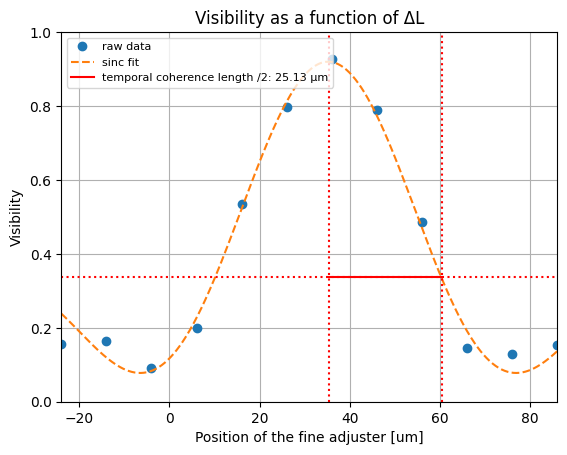

In [16]:
# fitiing function

def f(x, x0, w, A, C):
  return A*np.sinc((x-x0)/w) + C

df_sorted = df_coherence.sort_values("position_fine_adjuster")

x = df_sorted["position_fine_adjuster"].to_numpy()
y = df_sorted["visibility"].to_numpy()

# initial guesses
x0_guess = x[np.argmax(y)]
A_guess  = y.max() - y.min()
C_guess  = y.min()
w_guess  = (x.max() - x.min()) / 5.0

p0 = [x0_guess, w_guess, A_guess, C_guess]

popt, pcov = curve_fit(f, x, y, p0)
x0, w, A, C = popt

x_fit = np.linspace(x.min(), x.max(), 500)
data_fit = f(x_fit, x0, w, A, C)

plt.figure()
plt.plot(x, y, linestyle="None", marker="o", label = "raw data")
plt.plot(x_fit, data_fit, linestyle="--", label = "sinc fit")
plt.xlabel("Position of the fine adjuster [um]")
plt.ylabel("Visibility")
plt.xlim(df_coherence["position_fine_adjuster"].min(), df_coherence["position_fine_adjuster"].max())
plt.ylim(0, 1)

# temporal length calculation

imax = np.argmax(data_fit)
best_visibility = data_fit[imax]
best_position = x_fit[imax]
threshold = best_visibility * (1/exp(1))

idx = np.where(data_fit <= threshold)[0][0]

right_indices = np.where((data_fit <= threshold) & (x_fit > best_position))[0]

if len(right_indices) > 0:
    idx = right_indices[0]
    x_at = x_fit[idx]

xmin_data, xmax_data = plt.xlim()

xmin_frac = (x_fit[imax] - xmin_data) / (xmax_data - xmin_data)
xmax_frac = (x_at        - xmin_data) / (xmax_data - xmin_data)

temporal_coherence_length = np.round(abs(x_fit[idx]-x_fit[imax]), 2)

plt.axhline(threshold, xmin = 0, xmax = 1, color="red", linestyle = 'dotted')
plt.axhline(threshold,xmin = xmin_frac,  xmax = xmax_frac, color="red", label = f"temporal coherence length /2: {temporal_coherence_length} µm")
plt.axvline(x_at, color="red", linestyle = "dotted")
plt.axvline(x_fit[imax], color="red", linestyle = "dotted")


print(f"Best visibility: {best_visibility.round(2)}")
print(f"Best position: {best_position.round(2)} µm")
print(f"temporal coherence length: {temporal_coherence_length*2} µm")

plt.title("Visibility as a function of ΔL")
plt.grid()
plt.legend(loc="upper left", fontsize=8)


In [17]:
# error on Lc computation, with Monte carlo error propagation algorithm

def coherence_length_from_params(params):
    x0, w, A, C = params

    # recompute fit curve
    data_fit = f(x_fit, x0, w, A, C)

    # find max
    imax = np.argmax(data_fit)
    best_visibility = data_fit[imax]
    threshold = best_visibility/np.e

    # find position where fit drops below 1/e
    right_indices = np.where((data_fit <= threshold) & (x_fit > x_fit[imax]))[0]
    if len(right_indices) == 0:
        return np.nan
    idx = right_indices[0]

    # convert to optical path difference
    return 2 * abs(x_fit[idx] - x_fit[imax])


# draw parameter samples
N_samples = 2000
param_samples = np.random.multivariate_normal(popt, pcov, size=N_samples)

# compute Lc for each sampled param set
Lc_samples = np.array([coherence_length_from_params(p) for p in param_samples])
Lc_samples = Lc_samples[~np.isnan(Lc_samples)]

Lc_mean = Lc_samples.mean()
Lc_std = Lc_samples.std()

print("Lc = ", Lc_mean.round(1), "+-", Lc_std.round(1), "µm")


Lc =  50.3 +- 1.7 µm


The visibility decreases as me move away from the initial position (where visibility is the highest: $V = 0.92$), which is expected since we dedicated the whole first part of the lab aranging the settings for maximal interference.

The experimental curve fits as a sinc function since, for a source with approximately rectangular spectral bandwidth, the temporal coherence function (and thus the visibility) is given by the Fourier transform of this spectrum, which has a sinc shape. Although the spectrum of our original source (pump beam) is probably not close to a rectangle shape, the wavelength filters select a narrow and nearly flat passband, resulting in an approximately rectangular spectral transmission and therefore a sinc-like coherence envelope.

From the fit, we can extract the temporal coherence length of our setup, which is the difference in optical path length that decreases visibility by a factor of $\frac{1}{e}$. It is visible on the graph as the bold red line and measured as $\frac{L_c}{2}= 25.13 \mu m$. Indeed, in the Michaelson interferometer, the light goes back and forth in arm b which implies that moving mirror b by $\delta x$ changes the optical path difference by:
<center>
$\Delta L = 2\delta x$
</center>

Therefore, we derived $L_c = 50.3 \pm 1.7 \mu m$. Since we computed Lc from the sinc fitting, the standard deviation from the mean value (50.3 $\mu m$) comes from the error of each fitting parameter derived from the Monte Carlo error propagation algorithm. This represents a relative precision of about 3–4 %, showing that the coherence length is fairly well constrained by our data.

Our light source maintains phase coherence for any difference in path length such as $\Delta L < L_c$. When $\Delta L > L_c$, the phase relationship between the two arms is lost and interference visibility diminishes toward zero.

## Quantum erasure measurements

### Preliminary exploration of the role of polarization


**Purpose of this experiment:**

For the final part of the lab, the interferometer is fixed around the position of maximum visibility, standard mesurement (phase scan over [9, 11] $\mu m$) are performed for different angles of the linear polarizers located in arm A and B. Finally, a 3rd linear polarizer (LPc) is introduced in between beam splitter 2 and detector B.

The objective is to observe how the interference visibility changes when we introduce extra information of the path taken by the photons (in this case the extra information is the polarization of light).

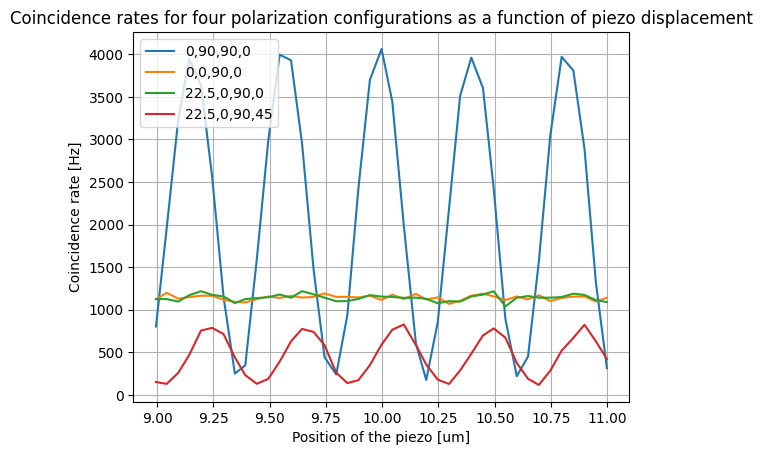

In [10]:
alpha = 22.5 # Replace with your value
beta = 45  # Replace with your value


rate_config1 = []
rate_config2 = []
rate_config3 = []
rate_config4 = []
count_config1 = []
count_config2 = []
count_config3 = []
count_config4 = []
Min_coinc_rate = []
Max_coinc_rate = []
Min_coinc_count = []
Max_coinc_count = []
arm_A_CR = []
arm_B_CR = []

file_1, file_1_A, file_1_B = "eras_0_90_90.csv", "eras_0_90_90_A.csv", "eras_0_90_90_B.csv"
file_2, file_2_A, file_2_B = "eras_0_0_90.csv", "eras_0_0_90_A.csv", "eras_0_0_90_B.csv"
file_3, file_3_A, file_3_B  = "eras_225_0_90.csv", "eras_225_0_90_A.csv", "eras_225_0_90_B.csv"
file_4, file_4_A , file_4_B = "eras_225_0_90_45.csv", "eras_225_0_90_45_A.csv", "eras_225_0_90_45_B.csv"

x = np.loadtxt(file_1, delimiter=";", skiprows = 1, usecols = 0, converters={0: conv}, encoding='latin-1')

for i in range (1, 5):
  current_file_rate = np.loadtxt(globals()[f"file_{i}"], delimiter=";", skiprows = 1, usecols = 1, converters={1: conv}, encoding='latin-1')
  globals()[f"rate_config{i}"].append(current_file_rate)
  Min_coinc_rate.append(min(current_file_rate))
  Max_coinc_rate.append(max(current_file_rate))
  current_file_count = np.loadtxt(globals()[f"file_{i}"], delimiter=";", skiprows = 1, usecols = 2, converters={2: conv}, encoding='latin-1')
  globals()[f"count_config{i}"].append(current_file_count[0])
  Min_coinc_count.append(min(current_file_count))
  Max_coinc_count.append(max(current_file_count))
  current_file_A = np.loadtxt(globals()[f"file_{i}_A"], delimiter=";", skiprows = 3, usecols = 1, converters={1: conv})
  arm_A_CR.append(current_file_A[9])
  current_file_B = np.loadtxt(globals()[f"file_{i}_B"], delimiter=";", skiprows = 3, usecols = 1, converters={1: conv})
  arm_B_CR.append(current_file_B[9])

data = {
    "hwp_angle": np.array([0, 0, alpha, alpha]),
    "lp_a_angle": np.array([90, 0, 0, 0]),
    "lp_b_angle": np.array([90, 90, 90, 90]),
    "lp_c_angle": np.array([0, 0, 0, beta]), # Only the last is relevant
    "min_coincidence_rate": np.array(Min_coinc_rate),
    "max_coincidence_rate": np.array(Max_coinc_rate),
    "arm_a_only_coincidence_rate": np.array(arm_A_CR),
    "arm_b_only_coincidence_rate": np.array(arm_B_CR),
}
df_erasure = pd.DataFrame(data)
df_erasure["visibility"] = (df_erasure["max_coincidence_rate"] - df_erasure["min_coincidence_rate"])/(df_erasure["max_coincidence_rate"] + df_erasure["min_coincidence_rate"])
df_erasure["distinguishability"] = 2*np.maximum(df_erasure["arm_a_only_coincidence_rate"], df_erasure["arm_b_only_coincidence_rate"])/(df_erasure["arm_a_only_coincidence_rate"] + df_erasure["arm_b_only_coincidence_rate"])-1
df_erasure["m_parameter"] = np.sqrt(df_erasure["visibility"]**2 + df_erasure["distinguishability"]**2)
df_erasure

T = 10 # integration time [s]
y_err_1 = np.sqrt(np.array(count_config1)) / T
y_err_2 = np.sqrt(np.array(count_config2)) / T
y_err_3 = np.sqrt(np.array(count_config3)) / T
y_err_4 = np.sqrt(np.array(count_config4)) / T

"""
plt.errorbar(
    x,
    rate_config1[0],
    yerr=y_err_1,
    linestyle="none",
    capsize=4,
    label="error on accidental coincidence rate")

plt.errorbar(
    x,
    rate_config2[0],
    yerr=y_err_2,
    linestyle="none",
    capsize=4,
    label="error on accidental coincidence rate")

plt.errorbar(
    x,
    rate_config3[0],
    yerr=y_err_3,
    linestyle="none",
    capsize=4,
    label="error on accidental coincidence rate")

plt.errorbar(
    x,
    rate_config4[0],
    yerr=y_err_4,
    linestyle="none",
    capsize=4,
    label="error on accidental coincidence rate")

"""
plt.plot(x, rate_config1[0], label = "0,90,90,0")
plt.plot(x, rate_config2[0], label = "0,0,90,0")
plt.plot(x, rate_config3[0], label = "22.5,0,90,0")
plt.plot(x, rate_config4[0], label = "22.5,0,90,45")
plt.title("Coincidence rates for four polarization configurations as a function of piezo displacement")
plt.xlabel("Position of the piezo [um]")
plt.ylabel("Coincidence rate [Hz]")
plt.legend(loc = "upper left")
plt.grid()

Here we plotted the coincidence rate of 4 configurations for the differents LP as a function a the scanning of the piezo. The legend entries indicate, respectively, the angles of the half-wave plate (HWP), LP_a, LP_b, and LP_c.

**Blue curve :** the two paths are effectively polarized in the same direction (90°), so the photons are indistinguishable. This allows two-photon interference, resulting in strong oscillations of the coincidence rate.

**Yellow an green curves :** the two arms are polarized orthogonally, which makes the photons distinguishable. As a consequence, interference vanishes and the coincidence rate remains essentially flat.

**Red curve :** By introducing the final polarizer at 45° (balance between the 2 polarization angles), we partially erase the which-path polarization information, making the photons partly indistinguishable again. Interference is therefore partially restored, although with a much smaller visibility than in the blue-curve case.

The error bars have been removed from the plotting for readability, as the statistical fluctuations are small compared to the signal amplitude.



### Quantitative study of erasure

**Purpose of this experiment:**

Balancing the final beam with a third polarizer (LP_c) can partially restore interference. In the previous plot, LP_c was set to 45°. Since 45° lies exactly between 0° and 90°, it projects photons from both arms equally onto the same polarization state. This effectively erases the polarization information, making the photons indistinguishable and allowing interference to reappear.

However, if LP_c is rotated toward one of the first two polarizer angles, the detection becomes biased: the projection favors photons from the arm whose polarization is closer to LP_c. This reintroduces which-path information and therefore reduces interference visibility.

This is what we want to witness in the final experiment. To do so, we measured coincidence rates for fixed angles of HWP, LP_a, LP_b (22.5°, 0°, 90°) as a function of the LP_c angle and calculated the value of Visibility and distinguishability for each of them.

In [11]:
LPC = [0, 15, 30, 45, 60, 75, 90]

min_CR = []
max_CR = []
arm_a_only_CR = []
arm_b_only_CR = []

for i in range (len(LPC)):
  c_angle = LPC[i]
  eras_file = f"eras_225_0_90_{c_angle}.csv"
  eras_file_A = f"eras_225_0_90_{c_angle}_A.csv"
  eras_file_B = f"eras_225_0_90_{c_angle}_B.csv"
  eras_rate = np.loadtxt(eras_file, delimiter=";", skiprows = 1, usecols = 1, converters={1: conv}, encoding='latin-1')
  min_CR.append(min(eras_rate))
  max_CR.append(max(eras_rate))
  coinc_rate_A = np.loadtxt(eras_file_A, delimiter=";", skiprows = 3, usecols = 1, converters={1: conv})
  coinc_rate_B = np.loadtxt(eras_file_B, delimiter=";", skiprows = 3, usecols = 1, converters={1:conv})
  arm_a_only_CR.append(coinc_rate_B[11])
  arm_b_only_CR.append(coinc_rate_A[11])

data = {
    "lp_c_angle": np.array(LPC),
    "min_coincidence_rate": np.array(min_CR),
    "max_coincidence_rate": np.array(max_CR),
    "arm_a_only_coincidence_rate": np.array(arm_a_only_CR),
    "arm_b_only_coincidence_rate": np.array(arm_b_only_CR),
}
df_final = pd.DataFrame(data)
df_final["visibility"] = (df_final["max_coincidence_rate"] - df_final["min_coincidence_rate"])/(df_final["max_coincidence_rate"] + df_final["min_coincidence_rate"])
df_final["distinguishability"] = 2*np.maximum(df_final["arm_a_only_coincidence_rate"], df_final["arm_b_only_coincidence_rate"])/(df_final["arm_a_only_coincidence_rate"] + df_final["arm_b_only_coincidence_rate"])-1
df_final["m_parameter"] = np.sqrt(df_final["visibility"]**2 + df_final["distinguishability"]**2)
df_final

,lp_c_angle,min_coincidence_rate,max_coincidence_rate,arm_a_only_coincidence_rate,arm_b_only_coincidence_rate,visibility,distinguishability,m_parameter
0,0,443.0,572.0,451.6,20.6,0.127094,0.912749,0.921555
1,15,281.0,703.0,460.4,43.5,0.428862,0.827347,0.931893
2,30,139.0,809.0,341.6,132.6,0.706751,0.440742,0.832917
3,45,117.0,827.0,231.4,230.7,0.752119,0.001515,0.752120
4,60,170.0,766.0,116.6,356.5,0.636752,0.507081,0.813993
5,75,310.0,654.0,54.2,453.1,0.356846,0.786320,0.863503
6,90,428.0,594.0,52.8,510.3,0.162427,0.812467,0.828544


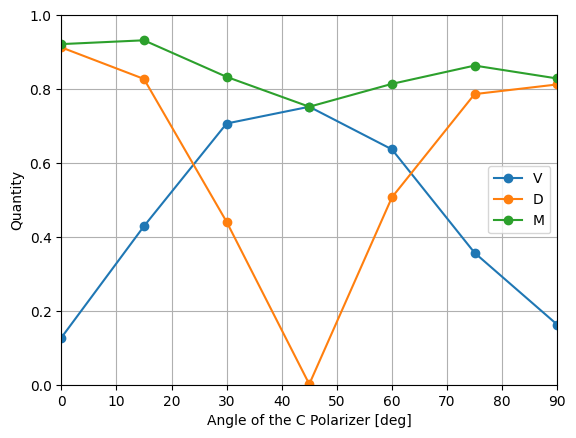

In [14]:
plt.figure()
plt.plot(df_final["lp_c_angle"], df_final["visibility"],  marker="o", label="V")
plt.plot(df_final["lp_c_angle"], df_final["distinguishability"], marker="o", label="D")
plt.plot(df_final["lp_c_angle"], df_final["m_parameter"], marker="o", label="M")
plt.xlabel("Angle of the C Polarizer [deg]")
plt.ylabel("Quantity")
plt.xlim(df_final["lp_c_angle"].min(), df_final["lp_c_angle"].max())
plt.ylim(0, 1)
plt.legend()
plt.grid()

The graph shows how the visibility $V$, distinguishability $D$ and the combined quantity $M=V²+D²$ vary with the angle of the C polarizer. As we rotate LPc, V and D are traded against each other: near 0° and 90° the paths are almost perfectly distinguishable (D large, V small), while around 45° the which-path information is largely erased and we recover high visibility with D≈0. This behaviour is the expected signature of wave–particle complementarity in the quantum eraser: changing the polarization basis shifts information between “which path” and “interference fringes.”

Distinguishability describes how well the measurement operated by LP_c is able to distinguish between the two arms. The more we get away from the middle value 45°, the more selective LP_c becomes with the 2 arms: close 90°, it is able to tell that majority of photons came from arm B, whereas close to 0°, more photons came from arm A.

For an ideal noise-free setup we should get $V^2+D^2 = 1$ and thus $M = 1$. In our experiment, imperfections, losses and noise reduce the achievable visibility and the accuracy of D, so M stays below 1 and follows the same trend as D, in agreement with the complementarity "imperfect" relation $V^2+D^2<1$. These imperfections can come from accidental coincidences and background counts that reduce the measured visibility, polarizers that are not perfectly ideal or aligned, or the two arms and detectors having slightly different losses and efficiencies.